['TSLA']
[*********************100%***********************]  1 of 1 completed

TSLA
experiment
[[141, 630, 16, 143.70000000000005], [134, 630, 13, 143.70000000000005]]


  0%|          | 0/580 [00:00<?, ?it/s]

experiment
[[59, 935.3766479492188, 32, 167.518310546875], [59, 765.2049865722656, 32, 337.6899719238281], [50, 935.3766479492188, 52, 167.518310546875], [50, 765.2049865722656, 52, 337.6899719238281], [113, 979.3766682942709, 3, 45.88334147135413], [111, 979.3766682942709, 6, 45.88334147135413], [134, 726.1849975585938, 13, 46.110015869140625], [133, 726.1849975585938, 2, 46.110015869140625]]
experiment
[[113, 979.3766682942709, 3, 45.88334147135413], [111, 979.3766682942709, 6, 45.88334147135413], [134, 726.1849975585938, 13, 46.110015869140625], [133, 726.1849975585938, 2, 46.110015869140625]]
experiment
[[113, 979.3766682942709, 3, 45.88334147135413], [111, 979.3766682942709, 6, 45.88334147135413], [134, 726.1849975585938, 13, 46.110015869140625], [133, 726.1849975585938, 2, 46.110015869140625]]
experiment
[[134, 726.1849975585938, 13, 46.110015869140625], [133, 726.1849975585938, 2, 46.110015869140625]]
experiment
[]
experiment
[]
experiment
[]
experiment
[]
experiment
[]
experime

experiment
[[60, 880.9500122070312, 64, 55.23248291015625], [60, 765.2049865722656, 64, 170.97750854492188], [60, 869.4299926757812, 64, 66.75250244140625], [60, 816.8399963378906, 64, 119.34249877929688], [60, 936.1824951171875, 64, 43.19417317708337], [60, 936.1824951171875, 64, 83.58418782552087], [60, 880.9500122070312, 67, 55.23248291015625], [60, 765.2049865722656, 67, 115.74502563476562], [60, 869.4299926757812, 67, 11.52001953125], [60, 816.8399963378906, 67, 64.11001586914062], [60, 880.9500122070312, 67, 98.42665608723962], [60, 880.9500122070312, 67, 138.81667073567712], [60, 765.2049865722656, 67, 170.97750854492188], [60, 765.2049865722656, 67, 115.74502563476562], [60, 765.2049865722656, 67, 104.22500610351562], [60, 765.2049865722656, 67, 51.635009765625], [60, 869.4299926757812, 67, 66.75250244140625], [60, 869.4299926757812, 67, 11.52001953125], [60, 765.2049865722656, 67, 104.22500610351562], [60, 816.8399963378906, 67, 52.589996337890625], [62, 816.8399963378906, 65,

experiment
[[60, 831.2266642252604, 67, 294.6082967122396], [60, 936.1824951171875, 67, 189.6524658203125], [60, 880.9500122070312, 67, 244.88494873046875], [60, 765.2049865722656, 67, 360.6299743652344], [60, 869.4299926757812, 67, 256.40496826171875], [50, 831.2266642252604, 77, 294.6082967122396], [50, 831.2266642252604, 77, 104.95583089192712], [50, 831.2266642252604, 77, 49.72334798177087], [50, 765.2049865722656, 77, 66.02167765299475], [50, 831.2266642252604, 77, 38.20332845052087], [50, 936.1824951171875, 74, 189.6524658203125], [50, 831.2266642252604, 74, 104.95583089192712], [50, 880.9500122070312, 74, 55.23248291015625], [50, 765.2049865722656, 74, 170.97750854492188], [50, 869.4299926757812, 74, 66.75250244140625], [50, 936.1824951171875, 74, 43.19417317708337], [50, 936.1824951171875, 74, 83.58418782552087], [50, 880.9500122070312, 77, 244.88494873046875], [50, 831.2266642252604, 77, 49.72334798177087], [50, 880.9500122070312, 77, 55.23248291015625], [50, 765.2049865722656

experiment
[[62, 844.5499877929688, 65, 93.02667236328125], [60, 844.5499877929688, 31, 93.02667236328125], [60, 765.2049865722656, 31, 172.37167358398438], [62, 765.2049865722656, 65, 172.37167358398438]]
experiment
[[62, 844.5499877929688, 65, 93.02667236328125], [60, 844.5499877929688, 31, 93.02667236328125], [60, 765.2049865722656, 31, 172.37167358398438], [62, 765.2049865722656, 65, 172.37167358398438]]
experiment
[[62, 844.5499877929688, 65, 93.02667236328125], [60, 844.5499877929688, 31, 93.02667236328125], [60, 765.2049865722656, 31, 172.37167358398438], [62, 765.2049865722656, 65, 172.37167358398438]]
experiment
[[62, 844.5499877929688, 65, 93.02667236328125], [60, 844.5499877929688, 31, 93.02667236328125], [60, 765.2049865722656, 31, 172.37167358398438], [62, 765.2049865722656, 65, 172.37167358398438]]
experiment
[[78, 765.2049865722656, 13, 179.46499633789062], [62, 765.2049865722656, 65, 179.46499633789062]]
experiment
[[78, 765.2049865722656, 13, 179.46499633789062], [62, 

experiment
[[60, 841.1100006103516, 73, 284.72496032714844], [60, 936.1824951171875, 73, 189.6524658203125], [60, 752.8033243815104, 73, 373.0316365559896], [60, 869.4299926757812, 73, 256.40496826171875], [50, 841.1100006103516, 83, 284.72496032714844], [50, 841.1100006103516, 83, 95.07249450683594], [50, 752.8033243815104, 83, 88.30667622884118], [50, 841.1100006103516, 83, 28.319992065429688], [50, 936.1824951171875, 83, 189.6524658203125], [50, 841.1100006103516, 83, 95.07249450683594], [50, 752.8033243815104, 83, 183.37917073567712], [50, 869.4299926757812, 83, 66.75250244140625], [50, 752.8033243815104, 77, 373.0316365559896], [50, 752.8033243815104, 77, 88.30667622884118], [50, 752.8033243815104, 77, 183.37917073567712], [50, 752.8033243815104, 77, 116.62666829427087], [50, 869.4299926757812, 83, 256.40496826171875], [50, 841.1100006103516, 83, 28.319992065429688], [50, 869.4299926757812, 83, 66.75250244140625], [50, 752.8033243815104, 83, 116.62666829427087], [141, 637.68499755

experiment
[[60, 841.1100006103516, 75, 284.72496032714844], [60, 936.1824951171875, 75, 189.6524658203125], [60, 745.6949920654297, 75, 380.1399688720703], [60, 869.4299926757812, 75, 256.40496826171875], [50, 841.1100006103516, 85, 284.72496032714844], [50, 841.1100006103516, 85, 95.07249450683594], [50, 745.6949920654297, 85, 95.41500854492188], [50, 841.1100006103516, 85, 28.319992065429688], [50, 841.1100006103516, 85, 138.2666676839193], [50, 841.1100006103516, 85, 178.6566823323568], [50, 936.1824951171875, 85, 189.6524658203125], [50, 841.1100006103516, 85, 95.07249450683594], [50, 745.6949920654297, 85, 190.4875030517578], [50, 869.4299926757812, 85, 66.75250244140625], [50, 936.1824951171875, 85, 43.19417317708337], [50, 936.1824951171875, 85, 83.58418782552087], [50, 745.6949920654297, 97, 380.1399688720703], [50, 745.6949920654297, 97, 95.41500854492188], [50, 745.6949920654297, 97, 190.4875030517578], [50, 745.6949920654297, 97, 123.73500061035156], [50, 745.6949920654297,

experiment
[[50, 1057.8533528645833, 85, 42.35911051432299], [50, 925.490007672991, 85, 132.3633451915922], [50, 927.0049947102865, 85, 130.84835815429676], [50, 816.8399963378906, 85, 241.01335652669263], [50, 745.6949920654297, 85, 312.15836079915357], [49, 1057.8533528645833, 86, 42.35911051432299], [49, 925.490007672991, 86, 174.7224557059152], [49, 927.0049947102865, 86, 173.20746866861975], [49, 816.8399963378906, 86, 283.3724670410156], [49, 745.6949920654297, 86, 354.51747131347656], [49, 925.490007672991, 86, 132.3633451915922], [49, 925.490007672991, 86, 174.7224557059152], [49, 816.8399963378906, 86, 108.65001133510043], [49, 745.6949920654297, 86, 179.79501560756137], [49, 925.490007672991, 86, 94.27667526971732], [49, 927.0049947102865, 86, 130.84835815429676], [49, 927.0049947102865, 86, 173.20746866861975], [49, 816.8399963378906, 86, 110.16499837239587], [49, 745.6949920654297, 86, 181.3100026448568], [49, 927.0049947102865, 86, 92.76168823242188], [49, 816.839996337890

experiment
[[3, 853.2866617838541, 124, 69.86833699544275], [3, 765.2049865722656, 124, 88.0816752115885], [3, 853.2866617838541, 124, 334.3933308919271], [3, 853.2866617838541, 121, 69.86833699544275], [3, 765.2049865722656, 121, 157.95001220703125], [3, 923.1549987792969, 121, 264.5249938964844], [3, 765.2049865722656, 124, 88.0816752115885], [3, 765.2049865722656, 124, 157.95001220703125], [3, 765.2049865722656, 124, 422.4750061035156], [60, 853.2866617838541, 67, 334.3933308919271], [60, 923.1549987792969, 67, 264.5249938964844], [60, 765.2049865722656, 67, 422.4750061035156]]
experiment
[[3, 853.2866617838541, 124, 69.86833699544275], [3, 765.2049865722656, 124, 88.0816752115885], [3, 853.2866617838541, 124, 334.3933308919271], [3, 853.2866617838541, 121, 69.86833699544275], [3, 765.2049865722656, 121, 157.95001220703125], [3, 923.1549987792969, 121, 264.5249938964844], [3, 765.2049865722656, 124, 88.0816752115885], [3, 765.2049865722656, 124, 157.95001220703125], [3, 765.20498657

experiment
[[50, 1067.1849975585938, 85, 120.4949951171875], [50, 851.1160034179687, 85, 336.5639892578125], [50, 924.9239990234375, 85, 262.7559936523437], [50, 745.6949920654297, 85, 441.98500061035156], [3, 1067.1849975585938, 132, 120.4949951171875], [3, 851.1160034179687, 132, 216.06899414062502], [3, 924.9239990234375, 132, 142.2609985351562], [3, 745.6949920654297, 132, 321.49000549316406], [3, 851.1160034179687, 132, 336.5639892578125], [3, 851.1160034179687, 132, 216.06899414062502], [3, 851.1160034179687, 132, 73.80799560546882], [3, 745.6949920654297, 132, 105.42101135253904], [3, 924.9239990234375, 132, 262.7559936523437], [3, 924.9239990234375, 132, 142.2609985351562], [3, 851.1160034179687, 132, 73.80799560546882], [3, 745.6949920654297, 132, 179.22900695800786], [3, 745.6949920654297, 144, 441.98500061035156], [3, 745.6949920654297, 144, 321.49000549316406], [3, 745.6949920654297, 144, 105.42101135253904], [3, 745.6949920654297, 144, 179.22900695800786], [3, 745.69499206

experiment
[[60, 796.5699768066406, 18, 391.1100158691406], [3, 796.5699768066406, 103, 391.1100158691406]]
experiment
[[60, 796.5699768066406, 18, 391.1100158691406], [3, 796.5699768066406, 103, 391.1100158691406]]
experiment
[[60, 796.5699768066406, 18, 391.1100158691406], [3, 796.5699768066406, 103, 391.1100158691406]]
experiment
[[60, 796.5699768066406, 18, 391.1100158691406], [3, 796.5699768066406, 103, 391.1100158691406]]
experiment
[[60, 796.5699768066406, 18, 391.1100158691406], [3, 796.5699768066406, 103, 391.1100158691406]]
experiment
[[49, 1027.1520141601563, 78, 160.5279785156249], [49, 1061.183984375, 78, 126.49600830078134], [49, 903.2460083007812, 78, 284.433984375], [49, 938.6871425083706, 78, 248.99285016741067], [49, 791.0224914550781, 78, 396.6575012207031], [3, 1027.1520141601563, 124, 160.5279785156249], [3, 1027.1520141601563, 124, 34.03197021484357], [3, 903.2460083007812, 124, 123.90600585937511], [3, 938.6871425083706, 124, 88.46487165178576], [3, 791.022491455

experiment
[[60, 818.0539916992187, 67, 369.6260009765625], [60, 923.1549987792969, 67, 264.5249938964844], [3, 818.0539916992187, 124, 369.6260009765625], [3, 818.0539916992187, 124, 105.10100708007815], [3, 923.1549987792969, 121, 264.5249938964844], [3, 818.0539916992187, 121, 105.10100708007815]]
experiment
[[60, 818.0539916992187, 67, 369.6260009765625], [60, 923.1549987792969, 67, 264.5249938964844], [3, 818.0539916992187, 124, 369.6260009765625], [3, 818.0539916992187, 124, 105.10100708007815], [3, 923.1549987792969, 121, 264.5249938964844], [3, 818.0539916992187, 121, 105.10100708007815]]
experiment
[[60, 818.0539916992187, 67, 369.6260009765625], [60, 923.1549987792969, 67, 264.5249938964844], [3, 818.0539916992187, 124, 369.6260009765625], [3, 818.0539916992187, 124, 105.10100708007815], [3, 923.1549987792969, 121, 264.5249938964844], [3, 818.0539916992187, 121, 105.10100708007815]]
experiment
[[60, 818.0539916992187, 67, 369.6260009765625], [60, 923.1549987792969, 67, 264.52

experiment
[[49, 1020.1650085449219, 78, 167.51498413085938], [49, 1067.1849975585938, 78, 120.4949951171875], [49, 815.8083292643229, 78, 371.87166341145837], [49, 910.3179931640625, 78, 277.36199951171875], [3, 1020.1650085449219, 124, 167.51498413085938], [3, 1020.1650085449219, 124, 47.019989013671875], [3, 815.8083292643229, 124, 204.356679280599], [3, 910.3179931640625, 124, 109.84701538085938], [3, 1067.1849975585938, 124, 120.4949951171875], [3, 1020.1650085449219, 124, 47.019989013671875], [3, 815.8083292643229, 124, 251.37666829427087], [3, 910.3179931640625, 124, 156.86700439453125], [3, 815.8083292643229, 124, 371.87166341145837], [3, 815.8083292643229, 124, 204.356679280599], [3, 815.8083292643229, 124, 251.37666829427087], [3, 815.8083292643229, 124, 94.50966389973962], [3, 910.3179931640625, 121, 277.36199951171875], [3, 910.3179931640625, 121, 109.84701538085938], [3, 910.3179931640625, 121, 156.86700439453125], [3, 815.8083292643229, 121, 94.50966389973962]]
experiment

experiment
[[49, 1020.1650085449219, 78, 167.51498413085938], [49, 1067.1849975585938, 78, 120.4949951171875], [49, 826.5699986049107, 78, 361.1099940708706], [49, 913.9316609700521, 78, 273.74833170572913], [3, 1020.1650085449219, 124, 167.51498413085938], [3, 1020.1650085449219, 124, 47.019989013671875], [3, 826.5699986049107, 124, 193.5950099400112], [3, 913.9316609700521, 124, 106.23334757486975], [3, 1067.1849975585938, 124, 120.4949951171875], [3, 1020.1650085449219, 124, 47.019989013671875], [3, 826.5699986049107, 124, 240.61499895368308], [3, 913.9316609700521, 124, 153.25333658854163], [3, 826.5699986049107, 124, 361.1099940708706], [3, 826.5699986049107, 124, 193.5950099400112], [3, 826.5699986049107, 124, 240.61499895368308], [3, 826.5699986049107, 124, 87.36166236514146], [3, 913.9316609700521, 121, 273.74833170572913], [3, 913.9316609700521, 121, 106.23334757486975], [3, 913.9316609700521, 121, 153.25333658854163], [3, 826.5699986049107, 121, 87.36166236514146], [134, 726.

experiment
[[49, 1000.6325073242188, 78, 159.8941446940105], [49, 826.5699986049107, 78, 333.9566534133186], [49, 949.2100016276041, 78, 211.3166503906251], [3, 1000.6325073242188, 124, 159.8941446940105], [3, 826.5699986049107, 124, 174.06250871930808], [3, 949.2100016276041, 124, 51.42250569661462], [3, 826.5699986049107, 124, 333.9566534133186], [3, 826.5699986049107, 124, 174.06250871930808], [3, 826.5699986049107, 124, 122.64000302269346], [3, 949.2100016276041, 121, 211.3166503906251], [3, 949.2100016276041, 121, 51.42250569661462], [3, 826.5699986049107, 121, 122.64000302269346], [134, 726.1849975585938, 22, 25.115005493164062], [133, 726.1849975585938, 21, 25.115005493164062], [133, 637.6849975585938, 21, 113.61500549316406], [134, 637.6849975585938, 22, 113.61500549316406]]
experiment
[[49, 1000.6325073242188, 78, 159.8941446940105], [49, 826.5699986049107, 78, 333.9566534133186], [49, 949.2100016276041, 78, 211.3166503906251], [3, 1000.6325073242188, 124, 159.8941446940105], 

experiment
[[49, 1000.6325073242188, 78, 159.8941446940105], [49, 826.5699986049107, 78, 333.9566534133186], [49, 949.2100016276041, 78, 211.3166503906251], [3, 1000.6325073242188, 124, 159.8941446940105], [3, 826.5699986049107, 124, 174.06250871930808], [3, 949.2100016276041, 124, 51.42250569661462], [3, 826.5699986049107, 124, 333.9566534133186], [3, 826.5699986049107, 124, 174.06250871930808], [3, 826.5699986049107, 124, 122.64000302269346], [3, 949.2100016276041, 121, 211.3166503906251], [3, 949.2100016276041, 121, 51.42250569661462], [3, 826.5699986049107, 121, 122.64000302269346], [134, 699.8600056966146, 22, 51.43999735514319], [133, 699.8600056966146, 21, 51.43999735514319]]
experiment
[[49, 1020.1650085449219, 78, 140.36164347330737], [49, 826.5699986049107, 78, 333.9566534133186], [49, 930.2485700334821, 78, 230.27808198474713], [3, 1020.1650085449219, 124, 140.36164347330737], [3, 826.5699986049107, 124, 193.5950099400112], [3, 930.2485700334821, 124, 89.91643851143976], [3,

experiment
[[49, 1000.6325073242188, 84, 159.8941446940105], [49, 814.2487487792969, 84, 346.27790323893237], [49, 949.2100016276041, 84, 211.3166503906251], [3, 1000.6325073242188, 130, 159.8941446940105], [3, 814.2487487792969, 130, 186.38375854492188], [3, 949.2100016276041, 130, 51.42250569661462], [3, 814.2487487792969, 124, 346.27790323893237], [3, 814.2487487792969, 124, 186.38375854492188], [3, 814.2487487792969, 124, 134.96125284830725], [3, 949.2100016276041, 130, 211.3166503906251], [3, 949.2100016276041, 130, 51.42250569661462], [3, 814.2487487792969, 130, 134.96125284830725], [135, 685.7900085449219, 19, 65.50999450683594], [134, 685.7900085449219, 22, 65.50999450683594]]
experiment
[[49, 1020.1650085449219, 84, 140.36164347330737], [49, 814.2487487792969, 84, 346.27790323893237], [49, 930.2485700334821, 84, 230.27808198474713], [3, 1020.1650085449219, 130, 140.36164347330737], [3, 814.2487487792969, 130, 205.916259765625], [3, 930.2485700334821, 130, 89.91643851143976], [

experiment
[[49, 1000.6325073242188, 86, 159.8941446940105], [49, 804.262220594618, 86, 356.2644314236112], [49, 949.2100016276041, 86, 211.3166503906251], [3, 1000.6325073242188, 132, 159.8941446940105], [3, 804.262220594618, 132, 196.3702867296007], [3, 949.2100016276041, 132, 51.42250569661462], [3, 804.262220594618, 153, 356.2644314236112], [3, 804.262220594618, 153, 196.3702867296007], [3, 804.262220594618, 153, 144.9477810329861], [3, 751.3000030517578, 153, 52.96221754286023], [3, 949.2100016276041, 132, 211.3166503906251], [3, 949.2100016276041, 132, 51.42250569661462], [3, 804.262220594618, 132, 144.9477810329861], [60, 751.3000030517578, 94, 52.96221754286023], [60, 637.6849975585938, 94, 113.61500549316406], [134, 637.6849975585938, 22, 113.61500549316406]]
experiment
[[49, 1000.6325073242188, 86, 159.8941446940105], [49, 804.262220594618, 86, 356.2644314236112], [49, 949.2100016276041, 86, 211.3166503906251], [3, 1000.6325073242188, 132, 159.8941446940105], [3, 804.26222059

experiment
[[49, 1000.6325073242188, 86, 159.8941446940105], [49, 804.262220594618, 86, 356.2644314236112], [49, 949.2100016276041, 86, 211.3166503906251], [3, 1000.6325073242188, 132, 159.8941446940105], [3, 804.262220594618, 132, 196.3702867296007], [3, 949.2100016276041, 132, 51.42250569661462], [3, 804.262220594618, 153, 356.2644314236112], [3, 804.262220594618, 153, 196.3702867296007], [3, 804.262220594618, 153, 144.9477810329861], [3, 751.3000030517578, 153, 52.96221754286023], [3, 949.2100016276041, 132, 211.3166503906251], [3, 949.2100016276041, 132, 51.42250569661462], [3, 804.262220594618, 132, 144.9477810329861], [60, 751.3000030517578, 94, 52.96221754286023], [60, 637.6849975585938, 94, 113.61500549316406], [134, 637.6849975585938, 22, 113.61500549316406]]
experiment
[[49, 1000.6325073242188, 86, 159.8941446940105], [49, 804.262220594618, 86, 356.2644314236112], [49, 949.2100016276041, 86, 211.3166503906251], [3, 1000.6325073242188, 132, 159.8941446940105], [3, 804.26222059

[[49, 1004.298583984375, 98, 140.9888916015625], [49, 976.7833319769966, 98, 168.50414360894092], [49, 804.262220594618, 98, 341.02525499131946], [49, 809.0119995117187, 98, 336.2754760742188], [3, 1004.298583984375, 144, 140.9888916015625], [3, 976.7833319769966, 144, 27.51525200737842], [3, 804.262220594618, 144, 200.03636338975696], [3, 809.0119995117187, 144, 195.28658447265627], [3, 976.7833319769966, 144, 168.50414360894092], [3, 976.7833319769966, 144, 27.51525200737842], [3, 804.262220594618, 144, 172.52111138237854], [3, 809.0119995117187, 144, 167.77133246527785], [3, 804.262220594618, 144, 341.02525499131946], [3, 804.262220594618, 144, 200.03636338975696], [3, 804.262220594618, 144, 172.52111138237854], [3, 804.262220594618, 144, 4.749778917100684], [3, 809.0119995117187, 151, 336.2754760742188], [3, 809.0119995117187, 151, 195.28658447265627], [3, 809.0119995117187, 151, 167.77133246527785], [3, 804.262220594618, 151, 4.749778917100684], [3, 637.6849975585938, 151, 171.327

experiment
[[60, 796.5699768066406, 18, 391.1100158691406], [3, 796.5699768066406, 103, 391.1100158691406]]
experiment
[[60, 796.5699768066406, 18, 391.1100158691406], [3, 796.5699768066406, 103, 391.1100158691406]]
experiment
[[60, 796.5699768066406, 18, 391.1100158691406], [3, 796.5699768066406, 103, 391.1100158691406]]
experiment
[[49, 1004.298583984375, 86, 121.8533935546875], [49, 948.0299987792969, 86, 178.12197875976562], [49, 804.262220594618, 86, 321.88975694444446], [3, 1004.298583984375, 132, 121.8533935546875], [3, 948.0299987792969, 132, 56.268585205078125], [3, 804.262220594618, 132, 200.03636338975696], [3, 948.0299987792969, 132, 178.12197875976562], [3, 948.0299987792969, 132, 56.268585205078125], [3, 804.262220594618, 132, 143.76777818467883], [3, 804.262220594618, 153, 321.88975694444446], [3, 804.262220594618, 153, 200.03636338975696], [3, 804.262220594618, 153, 143.76777818467883], [3, 751.3000030517578, 153, 52.96221754286023], [60, 751.3000030517578, 94, 52.96221

experiment
[[60, 796.5699768066406, 87, 391.1100158691406], [60, 855.8599853515625, 87, 331.82000732421875], [3, 796.5699768066406, 144, 391.1100158691406], [3, 796.5699768066406, 144, 59.290008544921875], [3, 855.8599853515625, 103, 331.82000732421875], [3, 796.5699768066406, 103, 59.290008544921875]]
experiment
[[60, 796.5699768066406, 87, 391.1100158691406], [60, 855.8599853515625, 87, 331.82000732421875], [3, 796.5699768066406, 144, 391.1100158691406], [3, 796.5699768066406, 144, 59.290008544921875], [3, 855.8599853515625, 103, 331.82000732421875], [3, 796.5699768066406, 103, 59.290008544921875]]
experiment
[[60, 796.5699768066406, 18, 391.1100158691406], [3, 796.5699768066406, 103, 391.1100158691406]]
experiment
[[49, 1004.298583984375, 86, 121.8533935546875], [49, 948.0299987792969, 86, 178.12197875976562], [49, 804.262220594618, 86, 321.88975694444446], [3, 1004.298583984375, 132, 121.8533935546875], [3, 948.0299987792969, 132, 56.268585205078125], [3, 804.262220594618, 132, 200

experiment
[[60, 796.5699768066406, 87, 391.1100158691406], [60, 855.8599853515625, 87, 331.82000732421875], [3, 796.5699768066406, 144, 391.1100158691406], [3, 796.5699768066406, 144, 59.290008544921875], [3, 855.8599853515625, 103, 331.82000732421875], [3, 796.5699768066406, 103, 59.290008544921875]]
experiment
[[60, 796.5699768066406, 87, 391.1100158691406], [60, 855.8599853515625, 87, 331.82000732421875], [3, 796.5699768066406, 144, 391.1100158691406], [3, 796.5699768066406, 144, 59.290008544921875], [3, 855.8599853515625, 103, 331.82000732421875], [3, 796.5699768066406, 103, 59.290008544921875]]
experiment
[[60, 796.5699768066406, 87, 391.1100158691406], [60, 855.8599853515625, 87, 331.82000732421875], [3, 796.5699768066406, 144, 391.1100158691406], [3, 796.5699768066406, 144, 59.290008544921875], [3, 855.8599853515625, 103, 331.82000732421875], [3, 796.5699768066406, 103, 59.290008544921875]]
experiment
[[60, 796.5699768066406, 18, 391.1100158691406], [3, 796.5699768066406, 103, 

experiment
[[60, 807.5674896240234, 67, 380.1125030517578], [60, 923.07666015625, 67, 264.60333251953125], [3, 807.5674896240234, 124, 380.1125030517578], [3, 807.5674896240234, 124, 115.50917053222656], [3, 923.07666015625, 121, 264.60333251953125], [3, 807.5674896240234, 121, 115.50917053222656]]
experiment
[[60, 807.5674896240234, 67, 380.1125030517578], [60, 923.07666015625, 67, 264.60333251953125], [3, 807.5674896240234, 124, 380.1125030517578], [3, 807.5674896240234, 124, 115.50917053222656], [3, 923.07666015625, 121, 264.60333251953125], [3, 807.5674896240234, 121, 115.50917053222656]]
experiment
[[60, 796.5699768066406, 87, 391.1100158691406], [60, 855.8599853515625, 87, 331.82000732421875], [3, 796.5699768066406, 144, 391.1100158691406], [3, 796.5699768066406, 144, 59.290008544921875], [3, 855.8599853515625, 103, 331.82000732421875], [3, 796.5699768066406, 103, 59.290008544921875]]
experiment
[[60, 796.5699768066406, 87, 391.1100158691406], [60, 855.8599853515625, 87, 331.8200

experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 807.5674896240234, 87, 380.1125030517578], [60, 886.0574951171875, 87, 301.62249755

experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.15599365

experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.15599365

experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 807.5674896240234, 87, 380.1125030517578], [60, 886.0574951171875, 87, 301.62249755

experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 807.5674896240234, 87, 380.1125030517578], [60, 886.0574951171875, 87, 301.62249755

experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.15599365

experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.15599365

experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 807.5674896240234, 87, 380.1125030517578], [60, 886.0574951171875, 87, 301.62249755

experiment
[[60, 818.0539916992187, 87, 369.6260009765625], [60, 893.5239990234375, 87, 294.1559936523438], [3, 818.0539916992187, 144, 369.6260009765625], [3, 818.0539916992187, 144, 75.47000732421873], [3, 893.5239990234375, 121, 294.1559936523438], [3, 818.0539916992187, 121, 75.47000732421873]]
experiment
[[60, 807.5674896240234, 87, 380.1125030517578], [60, 886.0574951171875, 87, 301.62249755859375], [3, 807.5674896240234, 144, 380.1125030517578], [3, 807.5674896240234, 144, 78.49000549316406], [3, 886.0574951171875, 121, 301.62249755859375], [3, 807.5674896240234, 121, 78.49000549316406]]
experiment
[[60, 807.5674896240234, 87, 380.1125030517578], [60, 886.0574951171875, 87, 301.62249755859375], [3, 807.5674896240234, 144, 380.1125030517578], [3, 807.5674896240234, 144, 78.49000549316406], [3, 886.0574951171875, 121, 301.62249755859375], [3, 807.5674896240234, 121, 78.49000549316406]]
experiment
[[60, 807.5674896240234, 87, 380.1125030517578], [60, 886.0574951171875, 87, 301.6224

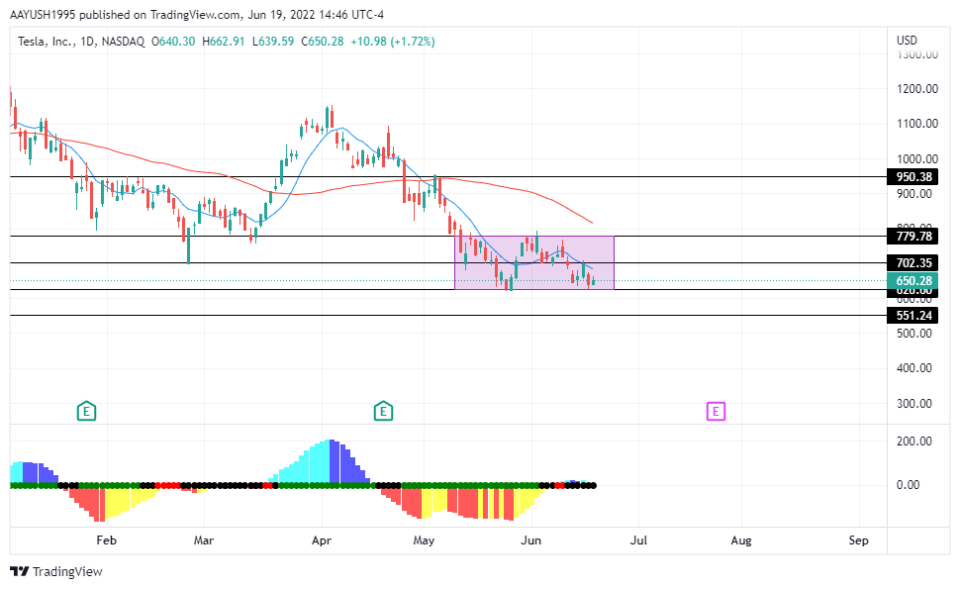

In [69]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
from IPython.display import display, HTML
from sr_cli import run


# TICKERS=['ARKK', 'ROKU', 'SHOP', 'TSLA', 'UPWK', 'ZM']
TICKER = 'TSLA'
  
class Args:
    no_sr_lines = False
    tickers=TICKER
    period='5y'
    interval='1d'
    start_date='2021-11-01'
    stop_date='2022-06-17'
    dif=10.0
    retracement_size=5
    no_candles=True
    draw_boxes=True
    number=2
    empty_boxes=False
    sample_only=False
    show_zags=False
    min=10
    optimize=False
    time=365
    verbose=False
    filter=False
    side_by_side=False

args=Args()
args.optimize = True

run(args)

from IPython.display import Image, display
display(Image(f"data/orig/{TICKER}.png"))

In [70]:
df = pd.read_csv('data/samples.csv')
df = df[df.symbol == TICKER]
sfile = f"data/samples/{TICKER}.png"
df.loc[:, 'source'] = f'<img height=400 width=800 src="out/samples/{TICKER}.png" alt="img2">'
df.loc[:, 'img'] = df.outfile.apply(lambda x:  f'<img height=400 width=800 src="{x}" alt="img">')
display(HTML("<style>div.output_scroll { height: 80em; }</style>"))
sortdf = df[['symbol', 'dif', 'ret', 'err', 'img', 'source']].sort_values(by=['err'])
# sortdf = sortdf[sortdf.err < 30]
sortdf = sortdf[sortdf.ret < 15]
sortdf = sortdf[sortdf.dif < 15]
display(HTML(sortdf.to_html(index=False, escape=False)))

# df.loc[:, 'source'] = f'<img height=400 width=800 src="{sfile}" alt="img2">'
# df.loc[:, 'img'] = df.outfile.apply(lambda x:  f'<img height=400 width=800 src="{x}" alt="img">')
# sortdf = sortdf[(sortdf.dif >= 10.0) & (sortdf.ret == 5.0)]

symbol,dif,ret,err,img,source
TSLA,1,8,3.558164,,
TSLA,1,6,3.931045,,
TSLA,1,7,3.931045,,
TSLA,1,14,4.279132,,
TSLA,1,13,4.279132,,
TSLA,1,12,4.279132,,
TSLA,1,11,4.279132,,
TSLA,1,10,4.279132,,
TSLA,1,9,4.279132,,
TSLA,3,9,15.650075,,
